<a href="https://colab.research.google.com/github/virtualfarhan/IIITH-PROJECTS/blob/main/Lab_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from sklearn.datasets import fetch_openml


In [57]:
# Load the Sonar dataset
sonar = fetch_openml(name='sonar', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [58]:
# Extract features and target labels
X = sonar.data
y = sonar.target

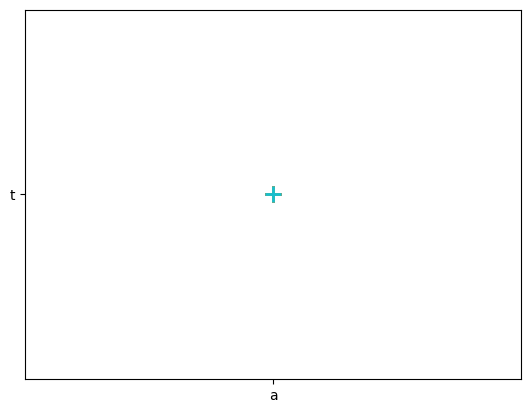

In [59]:
# Plotting similar to the previous code snippet
for d, sample in enumerate(X):
    # Plot negative samples
    if y[d] == 'R':
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

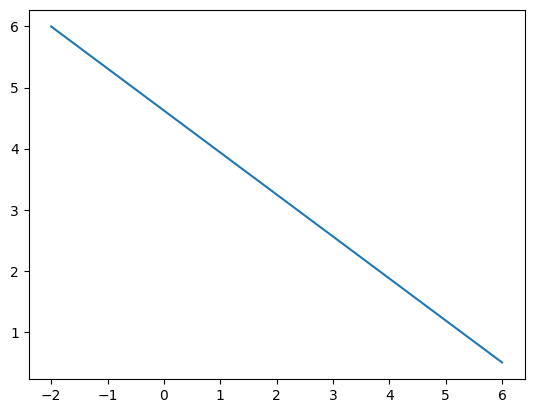

In [60]:
# Print a possible hyperplane that separates the two classes
plt.plot([-2, 6], [6, 0.5])
plt.show()

In [61]:
def perceptron_algo(X, Y, eta=1, epochs=10):
    w = np.zeros(len(X[0]))

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [62]:
def perceptron_algo_plot(X, Y, eta=1, n=30):
    w = np.zeros(len(X[0]))
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(-total_error)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title(f'Learning Rate: {eta}')

    return w

In [64]:
# Ensure X and y are NumPy arrays
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])
y = np.array([-1, -1, 1, 1, 1])

In [65]:
# Check shapes
print(X.shape)  # Should be (5, 3) for 5 samples with 3 features (including bias)
print(y.shape)  # Should be (5,) for 5 labels

(5, 3)
(5,)


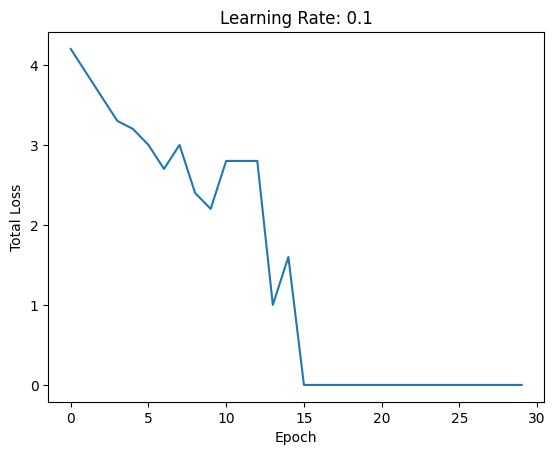

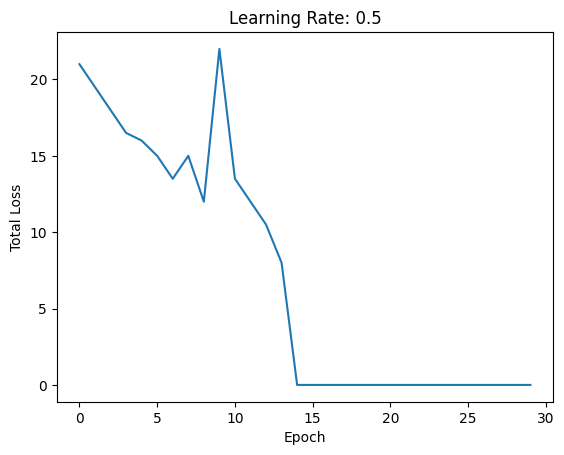

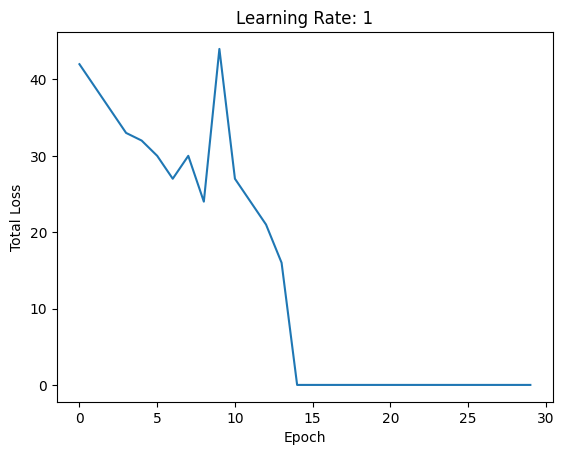

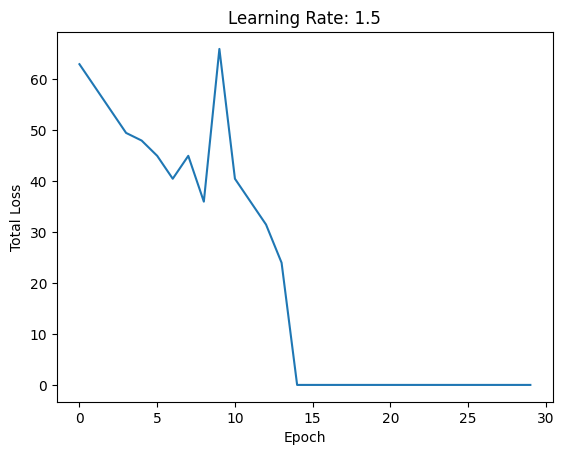

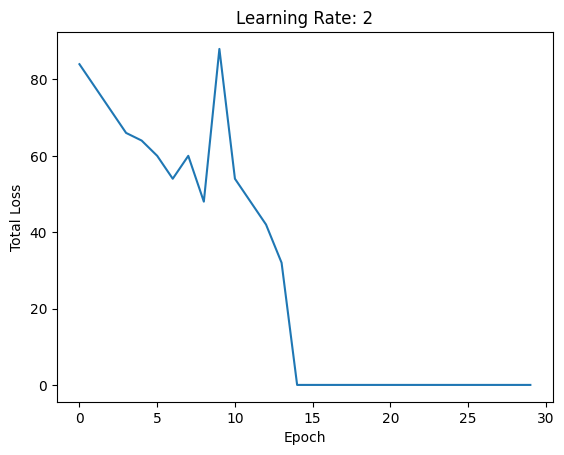

In [66]:
# Then proceed with the perceptron code
etas = [0.1, 0.5, 1, 1.5, 2]
for eta in etas:
    w = perceptron_algo_plot(X, y, eta=eta)
    plt.show()

In [70]:
X = np.array([
    [1, 2],
    [2, 3],
    [3, 4],
    [4, 5],
    [1, 4],
    [2, 5],
    [3, 6],
    [4, 7]
])
y = np.array([-1, -1, -1, -1, 1, 1, 1, 1])

In [71]:
# Create separate arrays for each class
class_minus_1 = X[y == -1]
class_1 = X[y == 1]

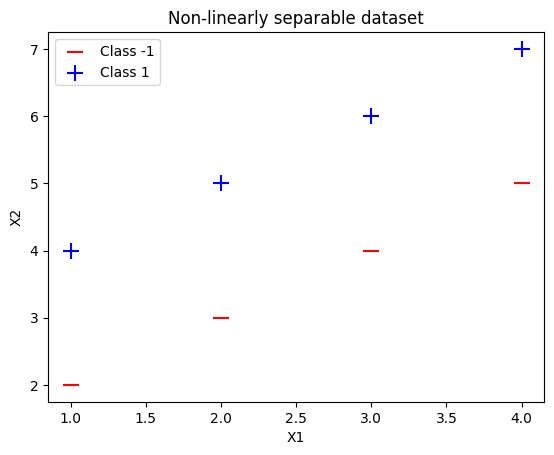

In [72]:
# Plotting the dataset
plt.scatter(class_minus_1[:, 0], class_minus_1[:, 1], color='red', marker='_', s=120, label='Class -1')
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', marker='+', s=120, label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Non-linearly separable dataset')
plt.legend()
plt.show()